In [4]:
from river.drift.adwin import ADWIN
from river.naive_bayes import GaussianNB
from river.tree.hoeffding_tree_classifier import HoeffdingTreeClassifier
from river.datasets.synth.stagger import STAGGER

from streamselect.adaptive_learning import BaseAdaptiveLearner
from streamselect.concept_representations import ErrorRateRepresentation
from streamselect.data.datastream import ConceptSegmentDataStream, make_stream_concepts
from streamselect.data.transition_patterns import circular_transition_pattern
from streamselect.data.utils import Concept, ConceptSegment, StateSegment
from streamselect.evaluation.monitoring import Monitor
from streamselect.evaluation.context_inference import plot_active_state_history, plot_ground_truth_contexts
from streamselect.repository import AbsoluteValueComparer



In [2]:
s0 = STAGGER(classification_function=0)
s1 = STAGGER(classification_function=1)
s2 = STAGGER(classification_function=2)
c0 = Concept(s0, "0")
c1 = Concept(s1, "1")
c2 = Concept(s2, "2")

n_repeats = 5
pattern = circular_transition_pattern(3, n_repeats, 1.0, 1, 0.0, shuffle_order=False)

segment_length = 1000
concept_segments = make_stream_concepts([c0, c1, c2], pattern, segment_length)

seed = 42
datastream = ConceptSegmentDataStream(concept_segments, 0, seed)

classifier = BaseAdaptiveLearner(
    classifier_constructor=HoeffdingTreeClassifier,
    representation_constructor=ErrorRateRepresentation,
    representation_comparer=AbsoluteValueComparer(),
    drift_detector_constructor=ADWIN,
    representation_window_size=50,
    representation_update_period=5,
    drift_detection_mode="lower",
)

for i, (X, y) in enumerate(datastream.take(datastream.n_samples)):
    classifier.predict_one(X, i)
    classifier.learn_one(X, y, timestep=i)


In [3]:
print(classifier.performance_monitor.active_state_history)

[0r-1:-1->1088, 1r0:1088->2112, 2r0:2112->2528, 3r0:2528->2848, 2r0:2848->3104, 0r0:3104->4096, 1r0:4096->5088, 3r0:5088->6080, 0r0:6080->7104, 1r0:7104->8096, 2r0:8096->9088, 0r0:9088->10080, 1r0:10080->10848, 4r0:10848->11296, 5r0:11296->11648, 4r0:11648->12096, 6r0:12096->13056, 1r0:13056->14112, 5r0:14112->14999]


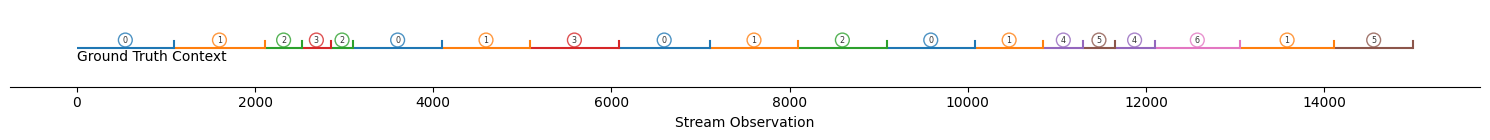

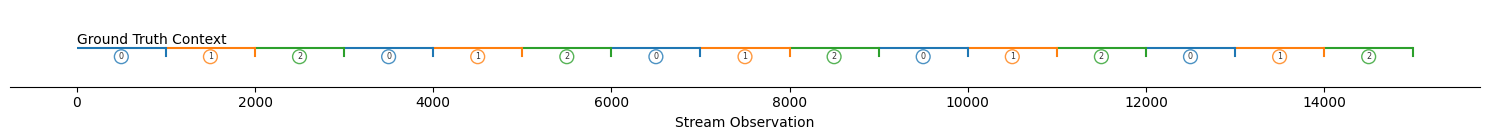

In [6]:
plot_active_state_history(classifier.performance_monitor.active_state_history)
plot_ground_truth_contexts(datastream.concept_segments)